# <font color='Blue'>Lending Club Case Study </font>

##### Group Members: 
1. Swagatha Swaminathan
2. Swapnil Kulkarni

## Assignment Overview

Lets assume that we work for a consumer finance company Lending Club which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

***Fully paid: Applicant has fully paid the loan 

***Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

***Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

### Data

We have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.

## <font color='Blue'>Exploratory Data Analysis</font>

In [1]:
#importing Required Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_rows', 80)

In [4]:
pd.set_option('display.max_columns', 80)

In [5]:
# Reading the given CSV files
loan=pd.read_csv("loan.csv",encoding="latin1",low_memory=False)

In [6]:
loan.shape

(39717, 111)

In [7]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# <font color='Red'>DataCleaning</font>

In [8]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#calculate percentage of missing values column wise(Creating a variable to store as number of columns is more and we can filter only those columns having null values)
null_values=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_values.loc[null_values>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

There are many columns having 100% Null values... Few have above 90% and one column has 64.66% null values... removing these columns.. 

In [10]:
#Listing columns with greater than 60% null values
Null_columns=list(null_values[null_values>=50].index)

len(Null_columns)

57

##### Above 57 columns can be deleted from the data set

In [11]:
loan = loan.drop(Null_columns,axis=1)
loan.shape

(39717, 54)

In [12]:
#Checking for other missing values
null_values=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_values.loc[null_values>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

#####  removing the Desc Column as it consists 32.58% of Null Values, and also the column is not relevant.

In [13]:
loan = loan.drop('desc',axis=1)
loan.shape

(39717, 53)

In [14]:
null_values=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_values.loc[null_values>0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [15]:
#Calculate number of unique values for remaining columns with null values
print("No. of Unique values for 'emp_title': ",len(loan.emp_title.unique()))
print("No. of Unique values for 'emp_length': ",len(loan.emp_length.unique()))
print("No. of Unique values for 'title': ",len(loan.title.unique()))
print("No. of Unique values for 'revol_util': ",len(loan.revol_util.unique()))
print("No. of Unique values for 'last_pymnt_d': ",len(loan.last_pymnt_d.unique()))
print("No. of Unique values for 'last_credit_pull_d': ",len(loan.last_credit_pull_d.unique()))
print("No. of Unique values for 'collections_12_mths_ex_med': ",len(loan.collections_12_mths_ex_med.unique()))
print("No. of Unique values for 'chargeoff_within_12_mths': ",len(loan.chargeoff_within_12_mths.unique()))
print("No. of Unique values for 'pub_rec_bankruptcies': ",len(loan.pub_rec_bankruptcies.unique()))
print("No. of Unique values for 'tax_liens': ",len(loan.tax_liens.unique()))

No. of Unique values for 'emp_title':  28821
No. of Unique values for 'emp_length':  12
No. of Unique values for 'title':  19616
No. of Unique values for 'revol_util':  1090
No. of Unique values for 'last_pymnt_d':  102
No. of Unique values for 'last_credit_pull_d':  107
No. of Unique values for 'collections_12_mths_ex_med':  2
No. of Unique values for 'chargeoff_within_12_mths':  2
No. of Unique values for 'pub_rec_bankruptcies':  4
No. of Unique values for 'tax_liens':  2


#### From the above unique values for each column, we can Identify "emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens" are Categorical Variables

##### Check the Unique values in each Categorical column

In [16]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [18]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [19]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [20]:
loan.tax_liens.unique()

array([ 0., nan])

#### From the above analysis, It is evident, that we can drop the columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens as they contain either 0 or NaN(Blank) as values.

In [21]:
# Dropping above mentioned columns
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)

In [22]:
loan.shape

(39717, 50)

##### Let us now consider the pub_rec_bankruptcies having 1.75% null values

In [23]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
null_values=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_values.loc[null_values>0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

##### Let us now remove the null values in the above columns

In [25]:
loan= loan[~loan.emp_title.isnull()]
loan= loan[~loan.emp_length.isnull()]
loan= loan[~loan.title.isnull()]
loan= loan[~loan.revol_util.isnull()]
loan= loan[~loan.last_pymnt_d.isnull()]
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [26]:
null_values=round(100*(loan.isnull().sum()/len(loan.index)),2)
null_values.loc[null_values>0]

Series([], dtype: float64)

In [27]:
loan.shape

(36433, 50)

##### We have cleared our Dataframe form null values

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [29]:
# Creating Duplicate dataframe, to work with

cleaned_loan=loan

In [30]:
# Checking no. of unique values in each column
cleaned_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

#### We can remove the id, member_id and url columns, as it has all as unique values and does not contribute to the analysis

In [31]:
cleaned_loan= cleaned_loan.drop(['id','member_id','url'],axis=1)

In [32]:
cleaned_loan.shape

(36433, 47)

##### Let us now consider the columns having single unique values- acc_now_delinq, application_type, policy_code, initial_list_status, delinq_amnt and pymnt_plan

#### We can remove these columns as they do not contribute to our analysis

In [33]:
cleaned_loan= cleaned_loan.drop(['acc_now_delinq', 'application_type', 'policy_code', 'initial_list_status', 'delinq_amnt','pymnt_plan'],axis=1)

In [34]:
cleaned_loan.shape

(36433, 41)

##### Let us check out the remaining columns

In [35]:
cleaned_loan.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection_recovery_fee     2386
dti                         2857
recoveries                  3585
annual_inc

#### Let us use the Data Dictionary file for better understanding of the remaining columns

We can Further remove the below columns:

1. addr_state: It is not required for the analysis
2. zip_code: It is not required for analysis
3. Funded_amnt: Its value is approximately the same as loan_amnt-Hence it can be dropped
4. funded_amnt_inv: The value is similar to the calue of Funded_amnt- It will not be required for analysis

In [36]:
cleaned_loan= cleaned_loan.drop(['addr_state','zip_code','funded_amnt','funded_amnt_inv'],axis=1)

In [37]:
cleaned_loan.shape

(36433, 37)

## We have dropped unnecessary rows, now we must standardise value according checkpoint of EDA

In [38]:
cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  object 
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

some of the columns which are to be rounded of upto two decimal places. That columns are

a.total_pymnt


b.total_rec_late_fee


c.collection_recovery_fee

In [39]:
cleaned_loan.total_pymnt.value_counts().head()

11196.569430    26
11784.232230    16
13148.137860    15
10956.775960    13
5478.387981     13
Name: total_pymnt, dtype: int64

In [40]:
cleaned_loan.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [41]:
cleaned_loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [42]:
cleaned_loan. pub_rec_bankruptcies.value_counts().tail()

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
cleaned_loan.total_pymnt=round(cleaned_loan.total_pymnt,2)
cleaned_loan.total_rec_late_fee=round(cleaned_loan.total_rec_late_fee,2)
cleaned_loan.collection_recovery_fee=round(cleaned_loan.collection_recovery_fee,2)

In [44]:
cleaned_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [45]:
def clean_in(n):
    return float(n.replace('%',''))

In [46]:
cleaned_loan.int_rate=cleaned_loan.int_rate.apply(clean_in)

In [47]:
cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   term                     36433 non-null  object 
 2   int_rate                 36433 non-null  float64
 3   installment              36433 non-null  float64
 4   grade                    36433 non-null  object 
 5   sub_grade                36433 non-null  object 
 6   emp_title                36433 non-null  object 
 7   emp_length               36433 non-null  object 
 8   home_ownership           36433 non-null  object 
 9   annual_inc               36433 non-null  float64
 10  verification_status      36433 non-null  object 
 11  issue_d                  36433 non-null  object 
 12  loan_status              36433 non-null  object 
 13  purpose                  36433 non-null  object 
 14  title                 

In [48]:
cleaned_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


There are some columns which are showing datetime but working as object in dataframe, chnaging datatype of those columns to datetime series

columns are 1) issue_d 2) earliest_cr_line 3) last_pymnt_d 4) last_credit_pull_d

Ref. Data Dictionary

In [49]:
cleaned_loan.issue_d = pd.to_datetime(cleaned_loan.issue_d, format='%b-%y')
cleaned_loan.earliest_cr_line = pd.to_datetime(cleaned_loan.earliest_cr_line, format='%b-%y')
cleaned_loan.last_pymnt_d = pd.to_datetime(cleaned_loan.last_pymnt_d, format='%b-%y')
cleaned_loan.last_credit_pull_d = pd.to_datetime(cleaned_loan.last_credit_pull_d, format='%b-%y')

In [50]:
cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  object        
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

Column Revol_until is also percentage column but data type is object, converting it into float

In [51]:
cleaned_loan.revol_util=cleaned_loan.revol_util.apply(clean_in)

next column is employment length column 

In [52]:
cleaned_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [53]:
dictionary={'10+ years':10,
'2 years':2,
'< 1 year':0,
'3 years':3,
'4 years':4,
'5 years':5,
'1 year': 1,
'6 years':6,
'7 years':7,
'8 years':8,
'9 years':9}

In [54]:
cleaned_loan=cleaned_loan.replace({'emp_length':dictionary})

In [55]:
cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

## CREATING DERIVED COLUMNS

In [56]:
#splitting earliest_cr_line column into two columns namely month and year
cleaned_loan['earliest_cr_line_month'] = cleaned_loan['earliest_cr_line'].dt.month
cleaned_loan['earliest_cr_line_year'] = cleaned_loan['earliest_cr_line'].dt.year

Checking for outliers in dataset

In [57]:
cleaned_loan['earliest_cr_line_year']=cleaned_loan.earliest_cr_line_year[cleaned_loan.earliest_cr_line_year<=2011].astype('Int64')

In [58]:
#splitting issue_d column into two columns namely month and year
cleaned_loan['issue_d_month'] = cleaned_loan['issue_d'].dt.month
cleaned_loan['issue_d_year'] = cleaned_loan['issue_d'].dt.year

In [59]:
cleaned_loan.shape

(36433, 41)

## Storing this cleaned_loan dataset to csv file filter_loan for analysis purpose

In [60]:
cleaned_loan.to_csv('filter_loan.csv', encoding='utf-8', index=False)

In [61]:
filter_loan=pd.read_csv('filter_loan.csv',encoding="latin1",low_memory=False)

In [62]:
#Correecting the datetime columns
filter_loan.issue_d = pd.to_datetime(filter_loan.issue_d)
filter_loan.earliest_cr_line = pd.to_datetime(filter_loan.earliest_cr_line)
filter_loan.last_pymnt_d = pd.to_datetime(filter_loan.last_pymnt_d)
filter_loan.last_credit_pull_d = pd.to_datetime(filter_loan.last_credit_pull_d)

In [63]:
filter_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

##### As per the above analysis, We can see that the loan_status column has 3 unique values. We will only the consider the loan status "Fully Paid" and "Charged Off" as Current status type is an ongoing loan

In [64]:
# Removing Rows having loan status as "Current"
filter_loan = filter_loan[filter_loan['loan_status'].isin(['Fully Paid','Charged Off'])]

In [65]:
#Observing loan_amt column

filter_loan.loan_amnt.describe()

count    35367.000000
mean     11133.071790
std       7326.233093
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# <font color='Red'>Performing Univariate Analysis</font>

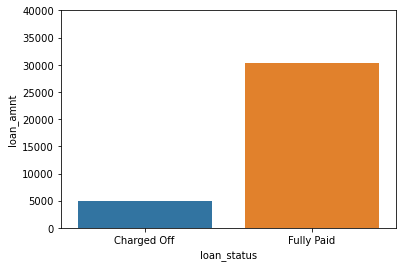

In [66]:
# Observing the Loan_amnt column wrt. Loan_Status(Target Column)

plot1=sns.barplot(x="loan_status",y="loan_amnt", data=filter_loan,estimator=lambda x: len(x))
plt.ylim(0,40000)
plt.show()

In [67]:
#Let us check the Percentage of defaulters of the loan using Loan_status column(Charged off status)
round(filter_loan.loc[filter_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(filter_loan))

14

#### 1.Most of the Loans are Fully Paid(No defaulters)
#### 2.From the above Analysis we can observe that 14% of the loan is having status as defaulters

### Let us now anaylyse the other categorical columns

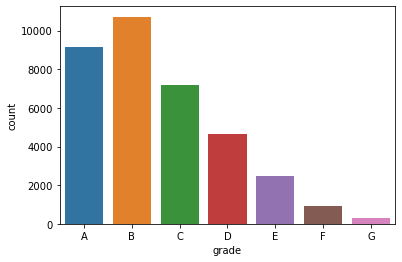

In [68]:
#Observing the Grade column to check the grade of most columns
df_grade=filter_loan.sort_values(by='grade')
plot2=sns.countplot(x='grade', data=df_grade)
plt.show()

#### We can observe from above plot that most of the loans belong to Grade A and B, implying that most of the loans are High Graded.

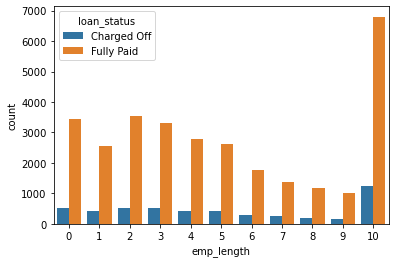

In [177]:
plot3=sns.countplot(x='emp_length', hue='loan_status', data=filter_loan)
plt.show()

#### It can be inferred from above graph that most of the loan applicants have a Work Exp of 10+ Years

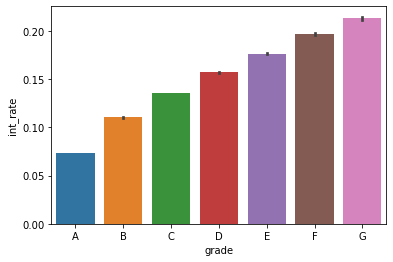

In [178]:
df_grade=filter_loan.sort_values(by='grade')
df_grade.int_rate=df_grade.int_rate/100
plot4=sns.barplot(y='int_rate', x='grade', data=df_grade)

#### We can infer from above plot that the higher the Grade(A), lower the interest rate

#### Creating a numeric column for Loan Status for Analysis Purpose

In [179]:
x = filter_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
filter_loan['loan_status_num'] = x


In [180]:
filter_loan.loan_status_num.value_counts()

0    30424
1     4943
Name: loan_status_num, dtype: int64

#### Let us now compare the Loan Status(numeric) data with the Categorical Variables.
#### Since the numeric value for the non-defaulters is set to 0, the plots will consider only the defaulters.
##### As calculated above, 14% of the Loan applicants are defaulters

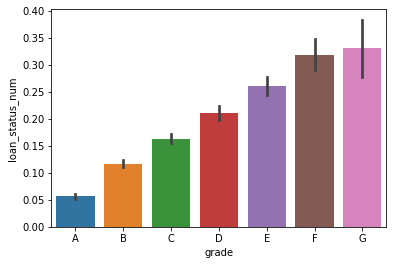

In [181]:
#Observing the Grade column to observe the defaulters at each grade
df_grade=filter_loan.sort_values(by='grade')
plot5=sns.barplot(x='grade', y='loan_status_num',data=df_grade)
plt.show()

#### We can observe from above plot that the default rate increases from Grade A - Grade G (i.e. Higher Grade to Lower Grade)

In [182]:
filter_loan.term.value_counts()

 36 months    26377
 60 months     8990
Name: term, dtype: int64

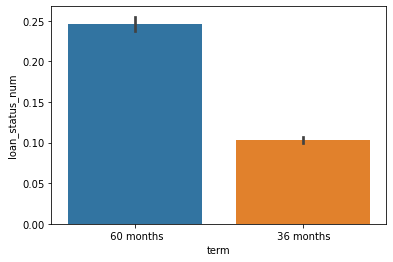

In [183]:
#Observing the term column to observe the no.of defaulters wrt to the Loan Term

plot6=sns.barplot(x='term', y='loan_status_num',data=filter_loan)
plt.show()

#### We can observe that the Longer term(60 months) has higher Defaulter rate

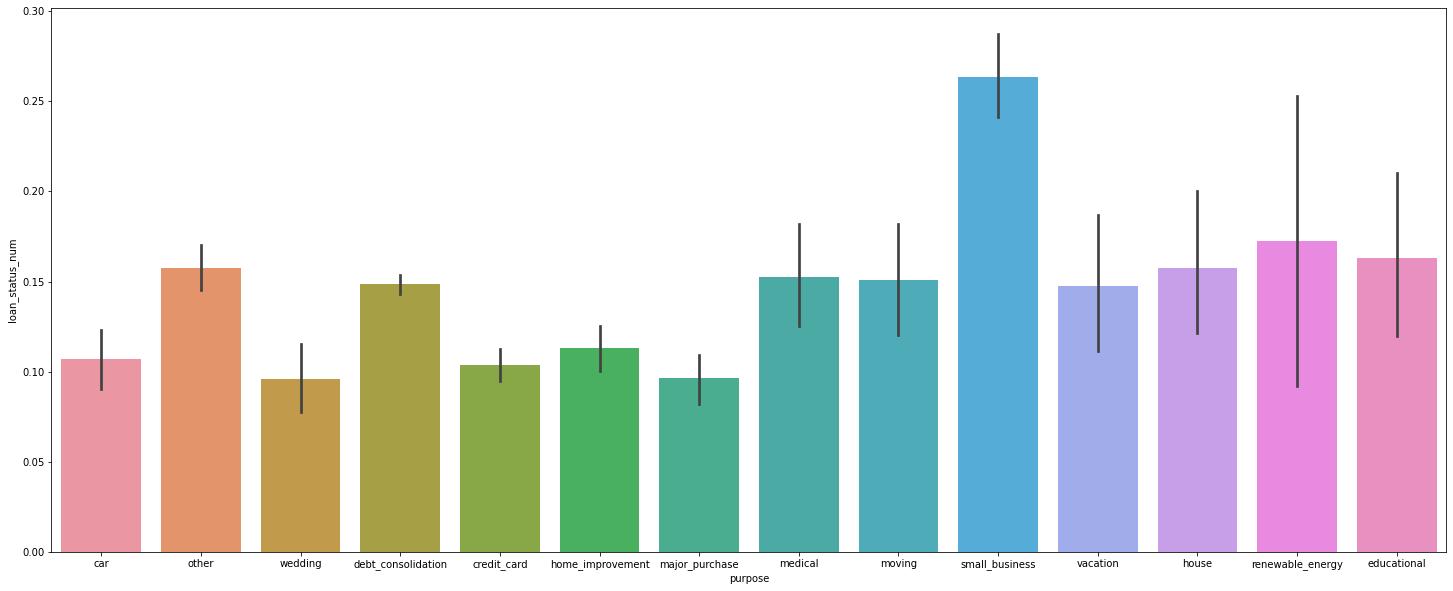

In [184]:
# Let us now observe, the Purpose column wrt to the defaulter rate and check which applicants default the most
plt.figure(figsize=(25, 10))
plot8=sns.barplot(x='purpose', y='loan_status_num',data=filter_loan)
plt.show()

#### We can observe that the max 3 Defaulters are Small_businesses,Rewable Energy and Educational

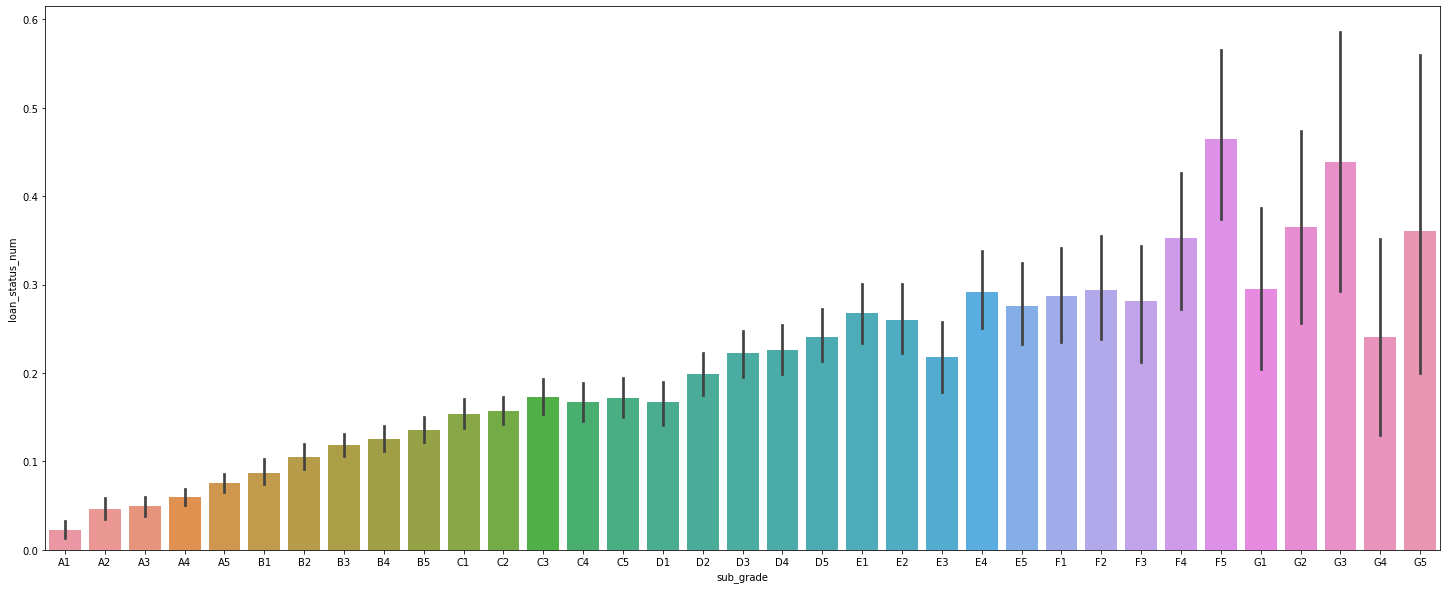

In [185]:
#Observing the Grade column to observe the defaulters at each grade
df_grade=filter_loan.sort_values(by='sub_grade')
plt.figure(figsize=(25, 10))
plot9=sns.barplot(x='sub_grade', y='loan_status_num',data=df_grade)
plt.show()

#### From above plot, we can get a similar observation as that of when done with the grade column- The lower the Grade(G) Higher the default rate

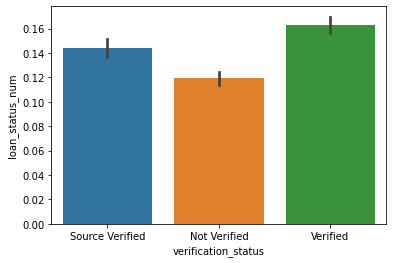

In [186]:
plot10=sns.barplot(x='verification_status', y='loan_status_num',data=filter_loan)
plt.show()

#### Ironically, from above plot it can be inferred that the Verifed Loans are having a Higher Default Rate

## Lets now begin with Analysing the Continuous Variables

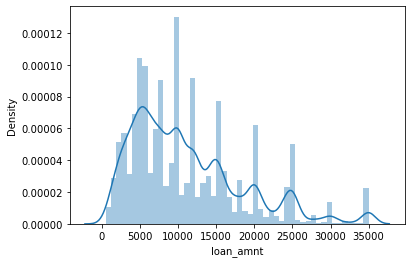

In [187]:
# Let us analyze the loan amount column using dist plot
plot11=sns.distplot(filter_loan['loan_amnt'])
plt.show()

##### Let us bin the loan_amnt column as loan_amt_bin and split it into 4 categories Low, Medium, High, Very High

In [188]:
def loan_amnt_bin(a):
    if a <5000:
        return 'Low'
    elif a>=5000 and a<15000:
        return 'Medium'
    elif a>=15000 and a<25000:
        return 'High'
    else:
        return 'Very High'

var=filter_loan['loan_amnt'].apply(loan_amnt_bin)
filter_loan['loan_amt_bin']=var 

In [189]:
filter_loan['loan_amt_bin'].value_counts()

Medium       19068
High          7147
Low           6611
Very High     2541
Name: loan_amt_bin, dtype: int64

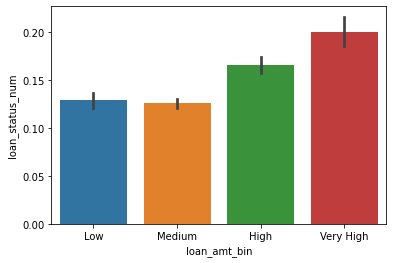

In [190]:
# Let us compare the binned loan_amt with loan status
plot12=sns.barplot(x='loan_amt_bin', y='loan_status_num',data=filter_loan)
plt.show()

#### We can infer from above graph that the higher the loan_amnt, higher the default rate

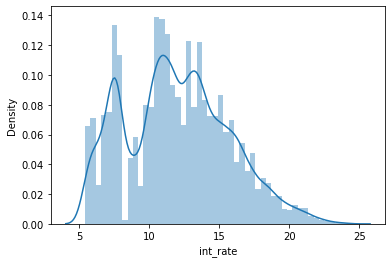

In [191]:
# Let us analyze the interest rate column using dist plot
plot13=sns.distplot(filter_loan['int_rate'])
plt.show()

##### Let us bin the int_rate column as int_rate_bin and split it into 3 categories Low, Medium, High

In [192]:
def int_rate_bin(a):
    if a<=10:
        return 'Low'
    elif a>10 and a<=15:
        return 'Medium'
    else:
        return 'High'
    
var=filter_loan['int_rate'].apply(int_rate_bin)
filter_loan['int_rate_bin']=var 

In [193]:
filter_loan['int_rate_bin'].value_counts()

Medium    16769
Low       11101
High       7497
Name: int_rate_bin, dtype: int64

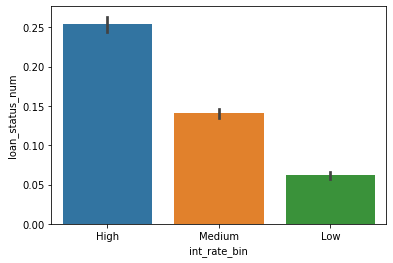

In [194]:
# Let us compare the binned int_rate with loan status
plot14=sns.barplot(x='int_rate_bin', y='loan_status_num',data=filter_loan)
plt.show()

#### We can infer from above graph that the higher interest rate has higher default rate

#### Let us take a similar approach on other continuous variables such as 'dti','installment','annual_inc' and 'emp_length' and plot the respective graphs wrt. loan status

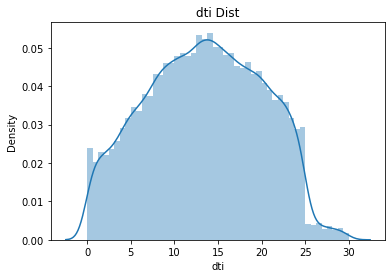

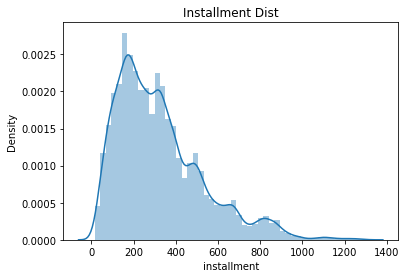

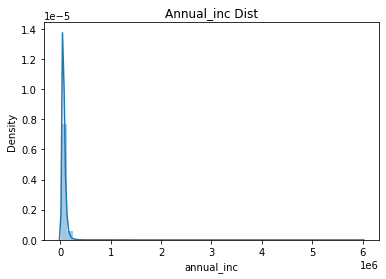

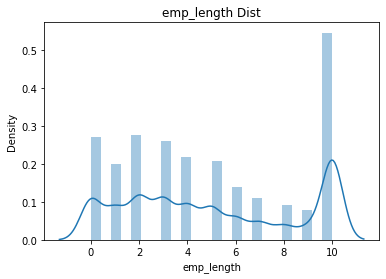

In [195]:
plot15=sns.distplot(filter_loan['dti'])
plt.title('dti Dist')
plt.show()

plot16=sns.distplot(filter_loan['installment'])
plt.title('Installment Dist')
plt.show()

plot17=sns.distplot(filter_loan['annual_inc'])
plt.title('Annual_inc Dist')
plt.show()

plot18=sns.distplot(filter_loan['emp_length'])
plt.title('emp_length Dist')
plt.show()

In [196]:
# DTI bin
def dti_bin(a):
    if a <= 10:
        return 'Low'
    elif a > 10 and a <=20:
        return 'Medium'
    else:
        return 'High'
    
var=filter_loan['dti'].apply(dti_bin)
filter_loan['dti_bin']=var 

In [197]:
# Installment bin
def installment_bin(a):
    if a <= 200:
        return 'Low'
    elif a > 200 and a <=400:
        return 'Medium'
    elif a > 400 and a <=600:
        return 'High'
    else:
        return 'Very High'
    
var=filter_loan['installment'].apply(installment_bin)
filter_loan['installment_bin']=var 

In [198]:
# Annual_inc bin
def annual_inc_bin(a):
    if a <= 50000:
        return 'Low'
    elif a > 50000 and a <=100000:
        return 'Medium'
    elif a > 100000 and a <=150000:
        return 'High'
    else:
        return 'Very High'
    
var=filter_loan['annual_inc'].apply(annual_inc_bin)
filter_loan['annual_inc_bin']=var 

In [199]:
# emp_length bin
def emp_length_bin(a):
    if a <= 1:
        return 'Fresher'
    elif a > 1 and a <=3:
        return 'Junior'
    elif a > 3 and a <=7:
        return 'Senior'
    else:
        return 'Super Senior'
    
var=filter_loan['emp_length'].apply(emp_length_bin)
filter_loan['emp_length_bin']=var 

In [200]:
# Creating a function to create a bar plot for all above columns
def plotbar(var):
    sns.barplot(x=var, y='loan_status_num',data=filter_loan)
    plt.show()

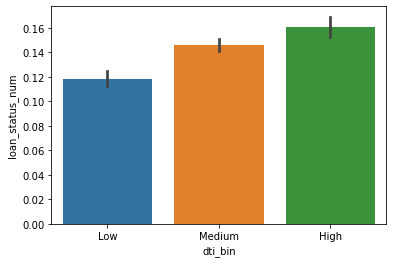

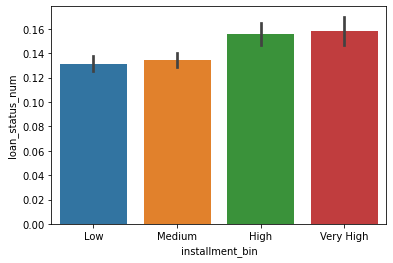

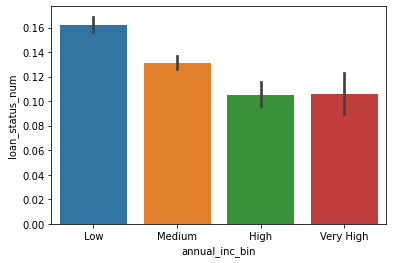

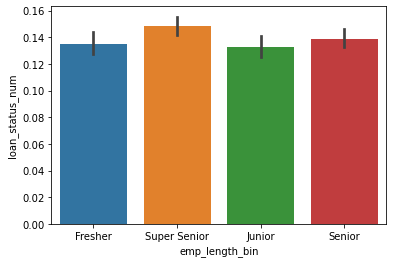

In [201]:
plot19=plotbar('dti_bin')
plot21=plotbar('installment_bin')
plot22=plotbar('annual_inc_bin')
plot23=plotbar('emp_length_bin')

#### From the above plots, we can infer the following:
#### Plot 1: Higher Dti, shows higher Defualt Rate
#### Plot 2: Higher Installment, shows higher Defualt Rate
#### Plot 3: Lower Annual Income, shows higher Defualt Rate
#### Plot 4: All the values seem to be at the same level, so we can't consider Emp_length as a Predictor

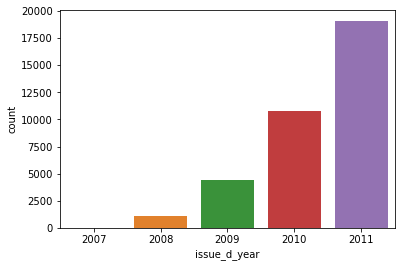

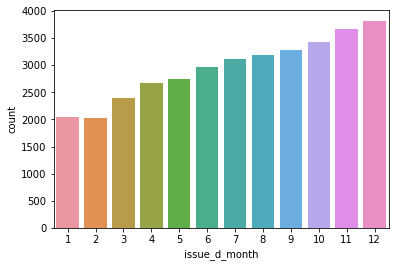

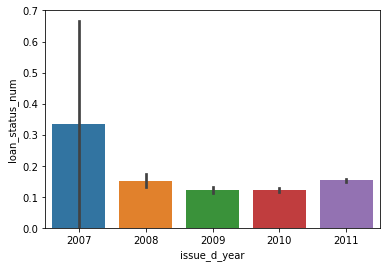

In [202]:
plot24=sns.countplot(x='issue_d_year',data=filter_loan)
plt.show()

plot25=sns.countplot(x='issue_d_month',data=filter_loan)
plt.show()

plot26=sns.barplot(x='issue_d_year', y='loan_status_num',data=filter_loan)
plt.show()

#### From the above Plots we can infer the following:
#### 1.From year 2007 to 2011, there is a significant increase in the number of loans issued
#### 2.There is a gradual increase in the number of loans issued from Jan to Dec.. Also, Dec is the month where most loans are being issued
#### 3.The Year of loan has no effect on the default rate

# <font color='Red'>Segmented Univariate Analysis</font>

#### From the above analysis, we can observe that the Purpose of the loan,Interest Rate,Grade, Annual Income,Loan_amnt,etc are one of the major Predictors.

#### In the Credit Industry, the purpose of loan is one of the factors having a major effect on the Default Rate.

#### Let us use the purpose to segment the Loan_applications across other Predictors

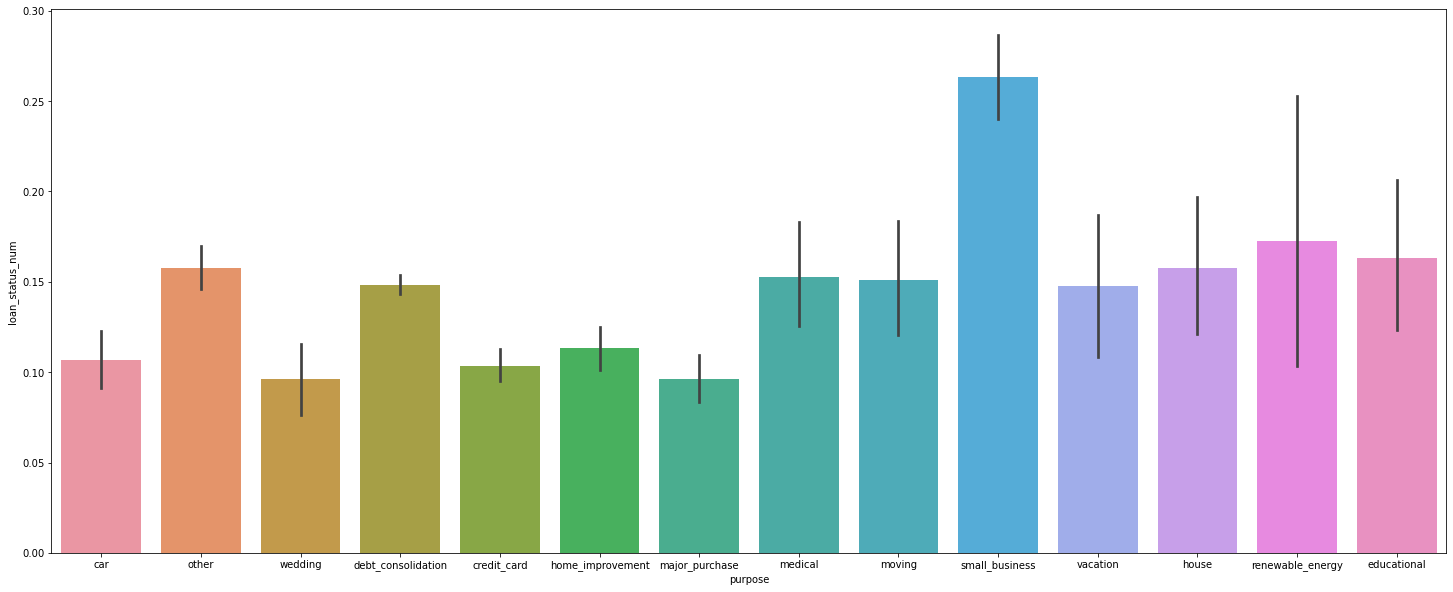

In [203]:
plt.figure(figsize=(25, 10))
plot27=sns.barplot(x='purpose',y='loan_status_num',data=filter_loan)
plt.show()

##### Let's analyse the top 4 types of loans based on purpose: debt_consolidation, credit card, other and home improvement.

In [204]:
top_purposes=["small_business","renewable_energy","other","educational"]
filter_loan= filter_loan[filter_loan['purpose'].isin(top_purposes)]
filter_loan['purpose'].value_counts()

other               3462
small_business      1351
educational          276
renewable_energy      87
Name: purpose, dtype: int64

#### let's now compare the default rates across two types of categorical variables(purpose of loan (constant) and another categorical variable (which changes))

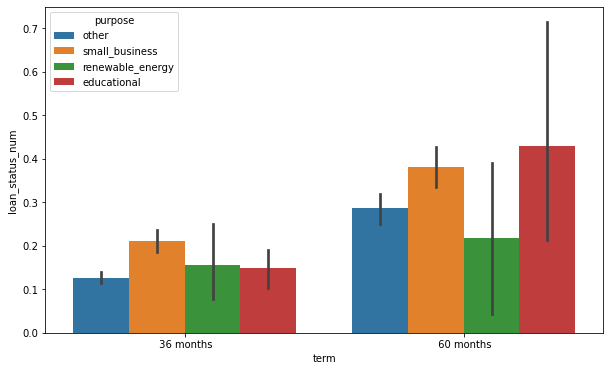

In [205]:
#Segmented Analysis on Loan_status wrt to Purpose and term

plt.figure(figsize=[10, 6])
plot28=sns.barplot(x='term', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

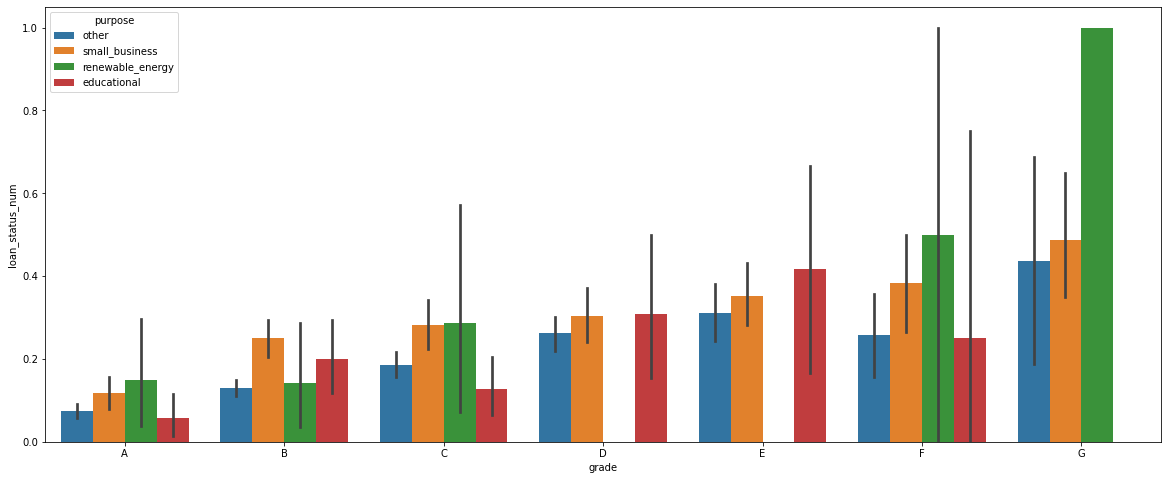

In [206]:
#Segmented Analysis on Loan_status wrt to Purpose and grade
df_grade=filter_loan.sort_values(by='grade')
plt.figure(figsize=[20, 8])
plot29=sns.barplot(x='grade', y="loan_status_num", hue='purpose', data=df_grade)
plt.show()

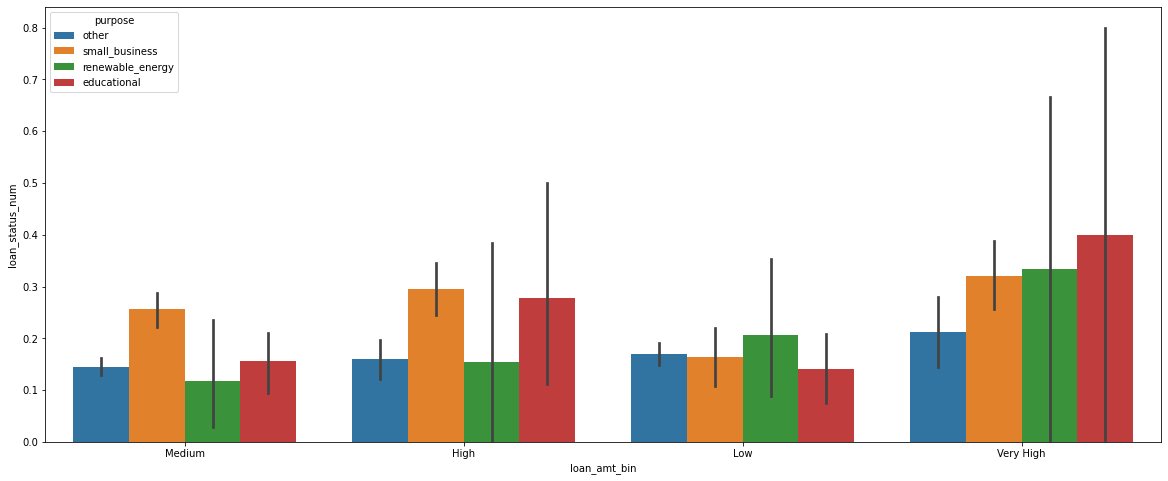

In [207]:
#Segmented Analysis on Loan_status wrt to Purpose and loan_amnt
plt.figure(figsize=[20, 8])
plot30=sns.barplot(x='loan_amt_bin', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

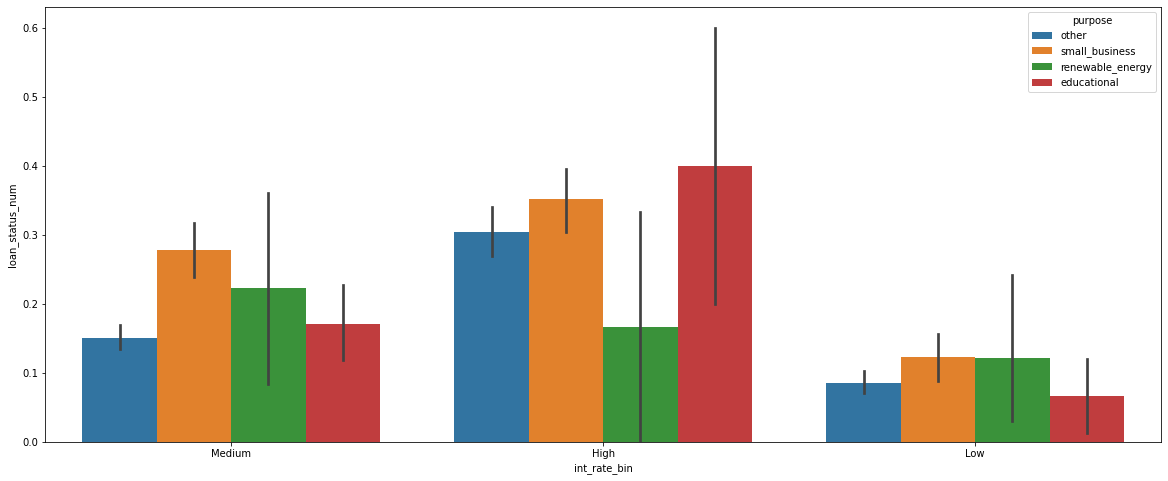

In [208]:
#Segmented Analysis on Loan_status wrt to Purpose and int_rate
plt.figure(figsize=[20, 8])
plot30=sns.barplot(x='int_rate_bin', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

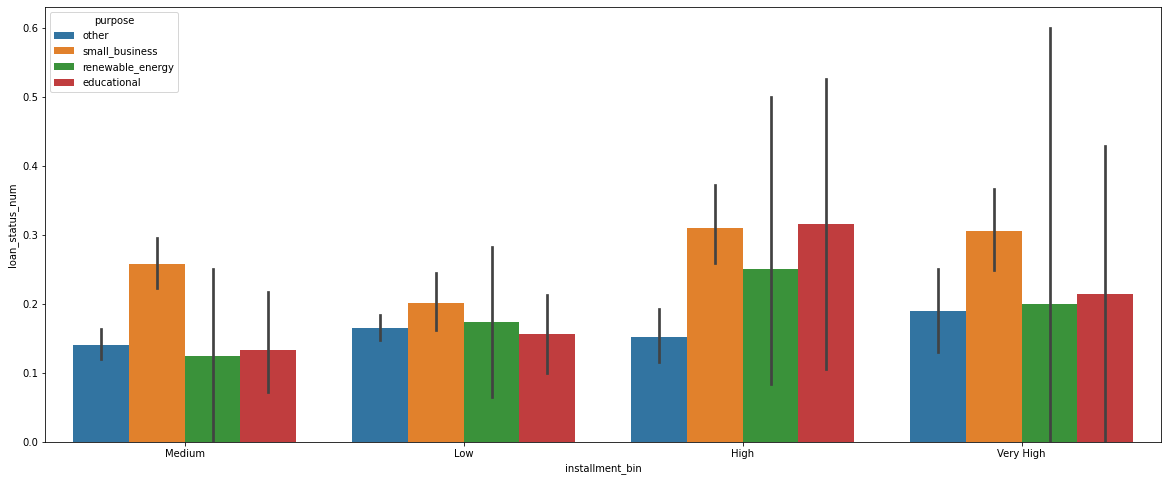

In [209]:
#Segmented Analysis on Loan_status wrt to Purpose and installment
plt.figure(figsize=[20, 8])
plot31=sns.barplot(x='installment_bin', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

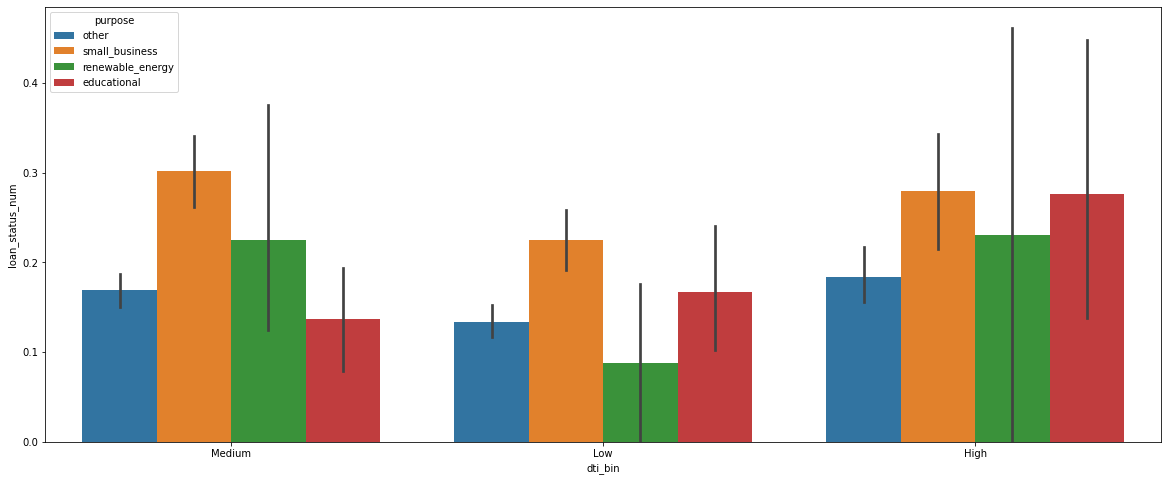

In [210]:
#Segmented Analysis on Loan_status wrt to Purpose and dti
plt.figure(figsize=[20, 8])
plot32=sns.barplot(x='dti_bin', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

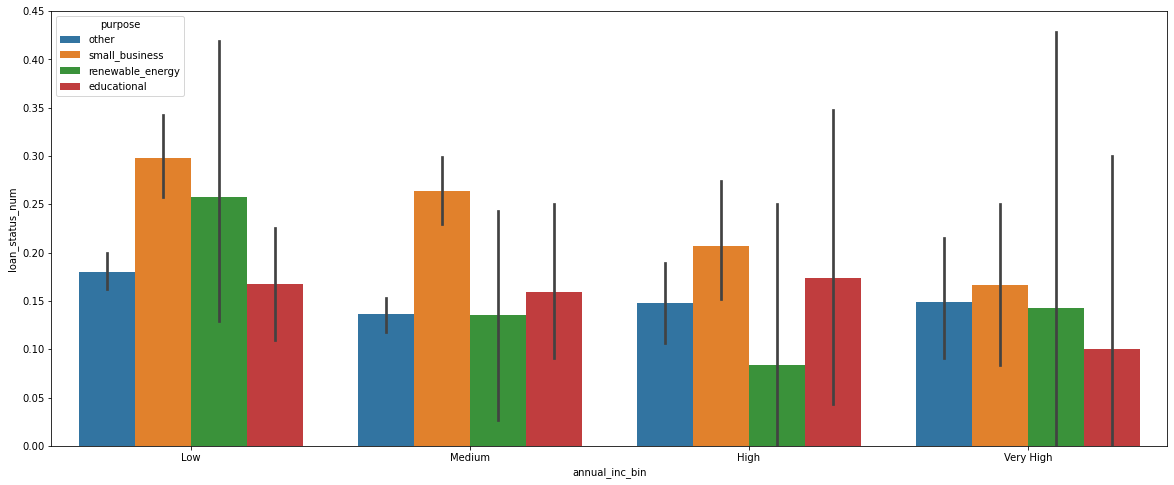

In [211]:
#Segmented Analysis on Loan_status wrt to Purpose and annual_income
df_grade=filter_loan.sort_values(by='grade')
plt.figure(figsize=[20, 8])
plot33=sns.barplot(x='annual_inc_bin', y="loan_status_num", hue='purpose', data=filter_loan)
plt.show()

### In order to depict the Effect of each of the above Categorical Variables on the default rate, Let us calculate the Difference in the default Rate across each of the Categorical Variables

In [212]:
Cat_var=['purpose','term','grade','dti_bin','installment_bin','loan_amt_bin','int_rate_bin']
def rate_diff(cat_var):
    default_rate=filter_loan.groupby(cat_var).loan_status_num.mean().sort_values(ascending=False)
    return (round(default_rate, 2), round(default_rate[0] - default_rate[-1], 2))

In [213]:
filter_loan_cat = filter_loan.loc[:, filter_loan.dtypes == object]
filter_loan_cat['loan_status_num'] = filter_loan['loan_status_num']
filter_loan_cat=filter_loan_cat.drop('loan_status',axis=1)

print([i for i in filter_loan_cat.columns])

['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'title', 'loan_amt_bin', 'int_rate_bin', 'dti_bin', 'installment_bin', 'annual_inc_bin', 'emp_length_bin', 'loan_status_num']


In [214]:
#Storing the diff of Default Rates in a Dictionary

Default_dict={key: rate_diff(key)[1]*100 for key in filter_loan_cat.columns if key != 'loan_status_num'}

In [215]:
print(Default_dict)

{'term': 17.0, 'grade': 40.0, 'sub_grade': 66.0, 'emp_title': 100.0, 'home_ownership': 7.000000000000001, 'verification_status': 6.0, 'purpose': 11.0, 'title': 100.0, 'loan_amt_bin': 12.0, 'int_rate_bin': 23.0, 'dti_bin': 5.0, 'installment_bin': 8.0, 'annual_inc_bin': 5.0, 'emp_length_bin': 2.0}


In [226]:
result_df=pd.DataFrame.from_dict(Default_dict,orient ='index') 

result_df.rename(columns = {0:'Rate_Diff'}, inplace = True) 
result_df=result_df.drop(['emp_title','title'])

result_df.sort_values(by='Rate_Diff',ascending=False)

,Rate_Diff
sub_grade,66.0
grade,40.0
int_rate_bin,23.0
term,17.0
loan_amt_bin,12.0
purpose,11.0
installment_bin,8.0
home_ownership,7.0
verification_status,6.0
dti_bin,5.0


# <font color='red'>Conclusion/Recommendation:</font>
#### <font color='green'>We can observe from the above result, That the Categorical columns, Sub_grade,Grade, Interest Rate, Loan Term and Purpose of the loan has the maximum Default Rate %...</font>
#### <font color='green'>The other factors such as Installment, Home_ownership,Verification_status, DTI, Annual Income of the borrower and the Employee Work Experience also have a slight effect on the Default Rate..</font>


# ----------------------------------*************************EOF*************************----------------------------------